<a href="https://colab.research.google.com/github/taraudani/EDA-FORK/blob/main/assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [1]:
from google.colab import files #importing csv file directly to notebook
uploaded = files.upload()

Saving ForeignGifts_edu.csv to ForeignGifts_edu.csv


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ForeignGifts_edu.csv')

588232.7172672832
94615.0
3222011.4279505583
-537770
99999999


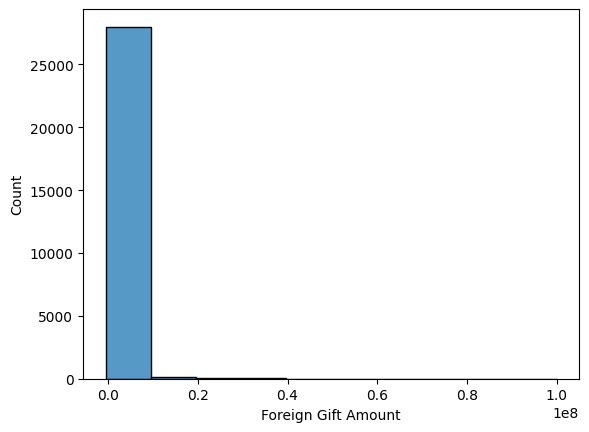

In [15]:
#Plotting histogram of foreign gift amounts
sns.histplot(df['Foreign Gift Amount'], bins=10)

#describing the variable with mean, median, sd, min, and max
mean_value = df['Foreign Gift Amount'].mean()
median_value = df['Foreign Gift Amount'].median()
std_dev = df['Foreign Gift Amount'].std()
min_value = df['Foreign Gift Amount'].min()
max_value = df['Foreign Gift Amount'].max()

print(mean_value)
print(median_value)
print(std_dev)
print(min_value)
print(max_value)

The range of the foreign gift amount is very large, from a negative value to hundreds of millions. This creates a fairly small median value with a much larger mean and standard deviation.

In [16]:
#Proportion of gift types with a value count table
df['Gift Type'].value_counts()

#17274/28221 = 0.61 Contract
#10936/28221 = 0.387 Monetary Gift
#11/28221 = 0.0003 Real Estate

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Kernel Density Plot of Log of Foreign Gift Amount')

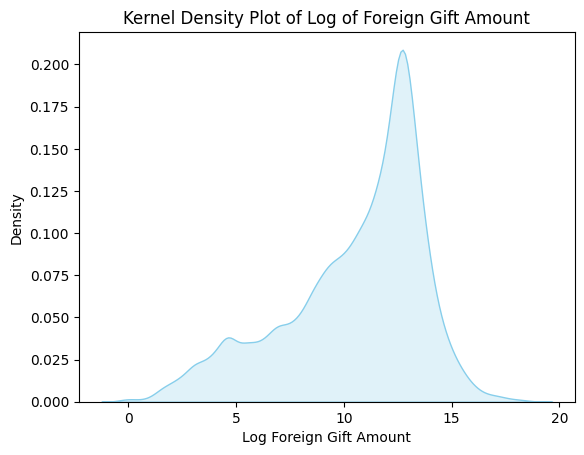

In [22]:
#KDE plot for the log of foreign gift amounts

df['Log Foreign Gift Amount'] = np.log(df['Foreign Gift Amount']) #taking the log
sns.kdeplot(df['Log Foreign Gift Amount'], fill=True, color='skyblue', label='Log of Foreign Gift Amount')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount')

#the log transformation helps smooth out the distribution, and separating by gift type shows how each type contributes to the curve.

Text(0.5, 1.0, 'Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')

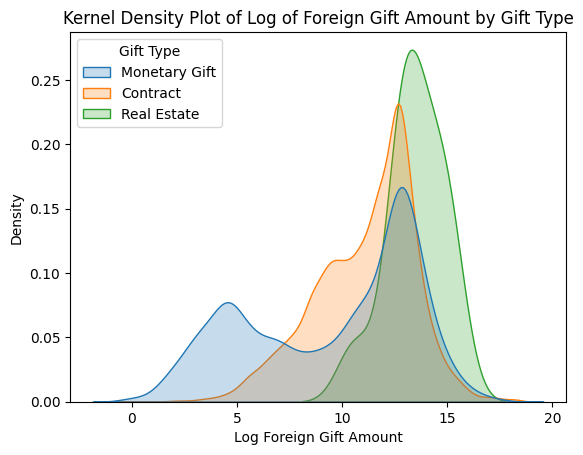

In [23]:
#KDE plot for the log of foreign gift amount based on gift type

sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', fill=True, common_norm=False) #hue skews colors based on gift type to make plot
plt.title('Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')

In [31]:
#top 15 countries by number of gifts
top_15_countries_by_count = df['Country of Giftor'].value_counts().head(15)
print("Top 15 countries by number of gifts:")
print(top_15_countries_by_count)

#top 15 countries by total amount given
top_15_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 countries by total amount given:")
print(top_15_countries_by_amount)


Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 countries by total amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA 


Top 15 institutions by total amount received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: in

Text(0.5, 1.0, 'Histogram of Total Amount Received by Institutions')

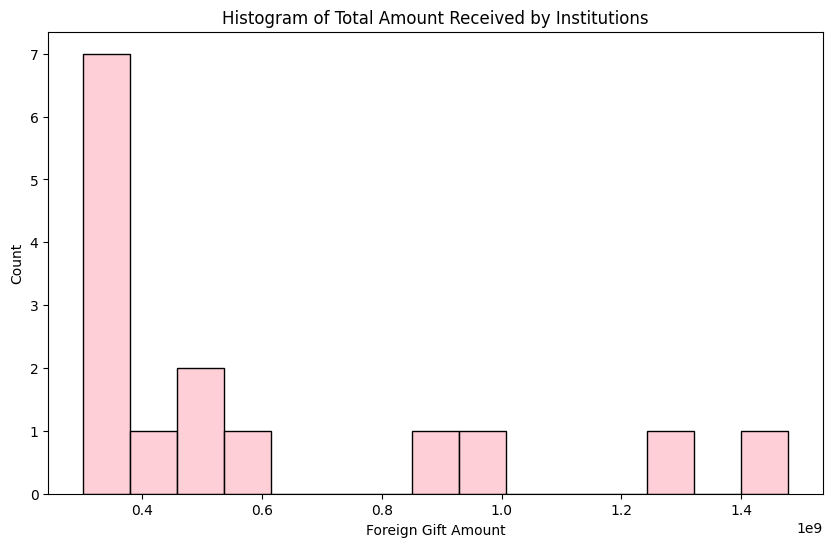

In [71]:
#top 15 institutions by total amount received
top_15_institutions_by_amount = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 institutions by total amount received:")
print(top_15_institutions_by_amount)

#histogram of the total amount received by all institutions
plt.figure(figsize=(10, 6))
sns.histplot(top_15_institutions_by_amount, kde=False, bins=15, color='pink')
plt.title('Histogram of Total Amount Received by Institutions')

In [34]:
#top giftors by total amount provided
top_giftors_by_amount = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop giftors by total amount provided:")
print(top_giftors_by_amount)


Top giftors by total amount provided:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [35]:
from google.colab import files #importing csv file directly to notebook
uploaded = files.upload()

Saving drilling_rigs.csv to drilling_rigs.csv


In [72]:
df1 = pd.read_csv('drilling_rigs.csv')

In [74]:
#Tells us number of observations
num_rows = df1.shape[0]
print("Number of observations: ", num_rows)

#Tells us number of variables
num_columns = df1.shape[1]
print("Number of variables: ", num_columns)

#numeric variables may need to be coerced in np to get rid of any extraneous dollar signs,commas, or spaces that make the numbers non-uniform. These will have to be removed and coerced into a numeric value.


Number of observations:  623
Number of variables:  10


In [75]:
#converting rig count to numeric, and months to datetime (cleaning variables for ease of use)

df1['Number of Rigs'] = pd.to_numeric(df1['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')
df1['time'] = pd.to_datetime(df1['Month'], format='mixed')

Text(0.5, 1.0, 'Number of Rigs Over Time')

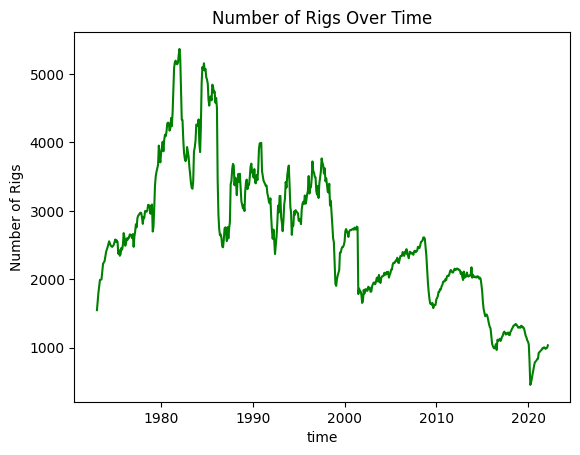

In [65]:
#Lineplot of total number of rigs over time using cleaned variables

sns.lineplot(data=df1, x='time', y='Number of Rigs', color='green')
plt.title('Number of Rigs Over Time')

#over time, the number of rigs in the past 50 years has decreased dramatically, with a spike in the number around the 1980s and 1990s

Text(0, 0.5, 'Change in Rig Count')

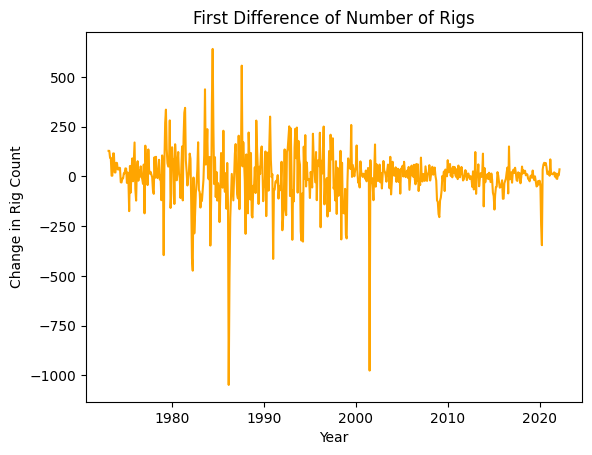

In [63]:
#First Difference of number of rigs

df1['FD Rig Count'] = df1['Number of Rigs'].diff() #calculating first difference
plt.plot(df1['time'], df1['FD Rig Count'], label='First Difference of Rig Count', color='orange')
plt.title('First Difference of Number of Rigs')
plt.xlabel('Year')
plt.ylabel('Change in Rig Count')

#the change in rig count has started to steady out over the past decades, with less difference occuring. This can be seen as the line plot becomes more stable and within certain bounds.

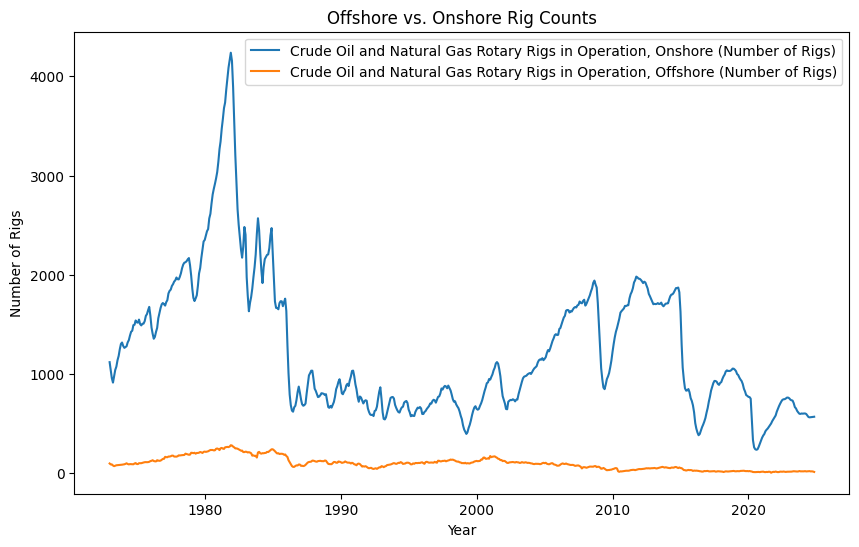

In [80]:
#Melting columns for onshore and offshore into one

df_melted = df1.melt(id_vars=['time'],
                   value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                               'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                   var_name='Rig Type', value_name='Rig Count') #melting on and off shore into rig count based on rig type

#plotting the melted data:
plt.figure(figsize=(10, 6))
for rig_type in df_melted['Rig Type'].unique(): #separating rig count by rig type
    subset = df_melted[df_melted['Rig Type'] == rig_type] #new df
    plt.plot(subset['time'], subset['Rig Count'], label=rig_type)
    plt.title('Offshore vs. Onshore Rig Counts')
    plt.xlabel('Year')
    plt.ylabel('Number of Rigs')
    plt.legend()

#The number of onshore rigs is what has changed the most drastically over the past decades. Offshore rigs are harder to change the number of because they are so hard to install and therefore take down.